In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
sns.set_theme(style="whitegrid")

In [2]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [8]:
with open('./logs/inv_0.20_28.19/price.pickle', 'rb') as fp:
    price = pickle.load(fp)
    
with open('./logs/inv_0.20_28.19/mo.pickle', 'rb') as fp:
    mo = pickle.load(fp)
    
with open('./logs/inv_0.20_28.19/Q.pickle', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('./logs/inv_0.20_28.19/inven.pickle', 'rb') as fp:
    inven = pickle.load(fp)

In [9]:
### convert to numpy array
pQ = np.array(Q)
pI = np.array(inven)
n_ins, n_period, n_agents, n_state, n_act = pQ.shape

price = np.array(price)
mo = np.array(mo)

In [ ]:
price.mean(axis=1)

In [10]:
# Generate statistics in tables by loading logs manually
# divided by 2 for bid and ask, averaged over agents already
np.mean(price/2), np.std(price/2)

(1.811394810145217, 0.3740025495336579)

In [11]:
# Generate statistics in tables by loading logs manually
np.mean(mo/2/n_agents), np.std(mo/2/n_agents)

(8.0310625, 2.528255474846984)

In [ ]:
mo.mean(axis=1)

In [ ]:
pQ.shape

In [7]:
# subsetting to 10^5 per step
pQ = pQ[:, ::2, :, :, :]

In [8]:
n_ins, n_period, n_agents, n_state, n_act = pQ.shape

In [9]:
df = []
for ins in range(n_ins):
    for act in [0, 1, 4, 5, 6, 9]:
        val = pQ[ins, :, :, act, act].mean(1)
        df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(n_period), 
                                'actions':[str(act+1),]*n_period, 'step': np.arange(n_period)}))
Qdf = pd.concat(df)

In [10]:
Qdf.reset_index(inplace=True)

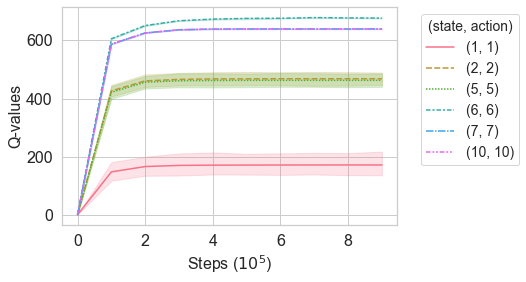

In [28]:
# figsize=(8,6)
plt.figure()
palette = sns.color_palette("husl", 6)
g = sns.lineplot(data=Qdf, x='step', y='Q', hue='actions', palette=palette, ci=95, style='actions') #
plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('Q-values', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
g.legend(bbox_to_anchor=(1.05, 1), fontsize=14, title_fontsize=14, handles=g.lines, title='(state, action)',
         labels=['(1, 1)', '(2, 2)', '(5, 5)', '(6, 6)', '(7, 7)', '(10, 10)'])
plt.savefig('Q.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [29]:
pI.shape

(20, 20, 2)

In [30]:
pI = pI[:, ::2, :]

In [31]:
df_temp = []
for ins in range(n_ins):
    for agent in range(n_agents):
        val = pI[ins, :, agent]
        df_temp.append(pd.DataFrame({'Inventory':val, 'instance': ins*np.ones(n_period), 
                                     'Agent':[str(agent+1),]*n_period, 'step': np.arange(n_period)}))
Idf = pd.concat(df_temp)

In [32]:
Idf.reset_index(inplace=True)

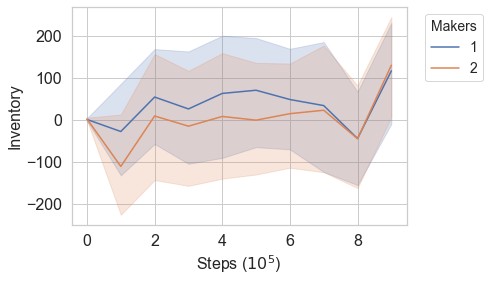

In [34]:
# figsize=(8,6)
plt.figure()
# palette = sns.color_palette("husl", 2)
g = sns.lineplot(data=Idf, x='step', y='Inventory', hue='Agent')

plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('Inventory', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.25, 1), title='Makers', fontsize=14, title_fontsize=14)
plt.savefig('inv.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)